<a href="https://colab.research.google.com/github/berfino/pandas_examples/blob/main/Matplotlib_SeabornOdev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Grafiklerin her birinde xlabel, ylabel ve title olsun. Başkası grafiğe baktığında anlayabilsin, grafikler kendini açıklayıcı olsun.

Renklendirmeler ve marker seçimleri uyumlu olsun.

Parametreler için seaborn'un kendi sitesinden faydalanabilirsiniz.

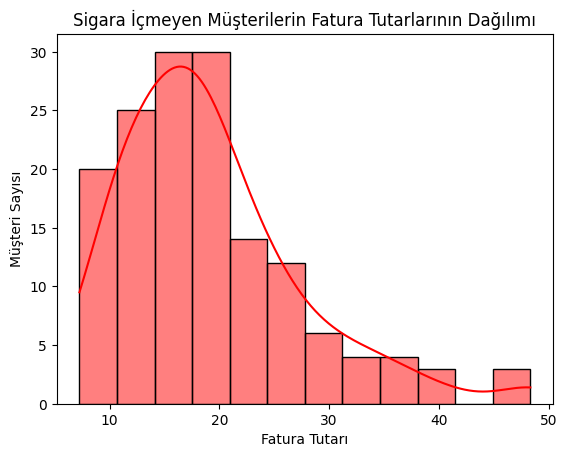

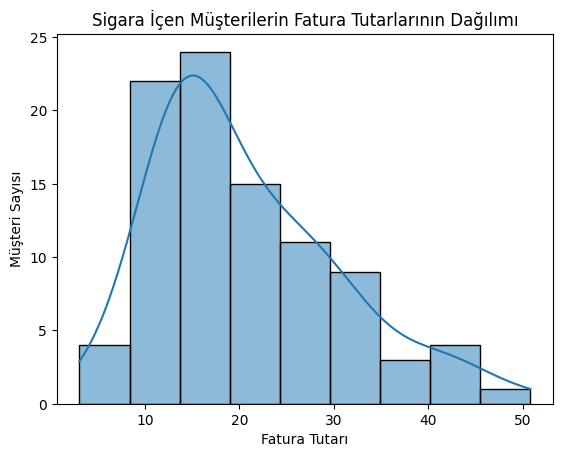

In [2]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.
sns.histplot(data=tips.loc[tips['smoker']=='No'], x="total_bill", color = 'red',kde = True)
plt.title('Sigara İçmeyen Müşterilerin Fatura Tutarlarının Dağılımı')
plt.xlabel('Fatura Tutarı')
plt.ylabel('Müşteri Sayısı')
plt.show()

# Sigara içen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram
sns.histplot(data=tips.loc[tips['smoker']=='Yes'], x="total_bill", kde= True)
plt.title('Sigara İçen Müşterilerin Fatura Tutarlarının Dağılımı')
plt.xlabel('Fatura Tutarı')
plt.ylabel('Müşteri Sayısı')
plt.show()

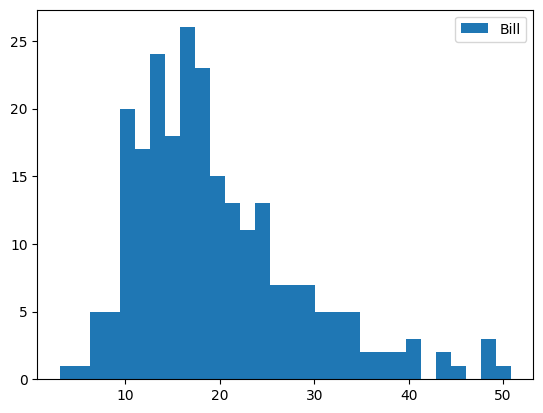

In [3]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.

plt.hist(tips['total_bill'], bins= 30, 
        label = 'Bill')


plt.legend()
plt.show()

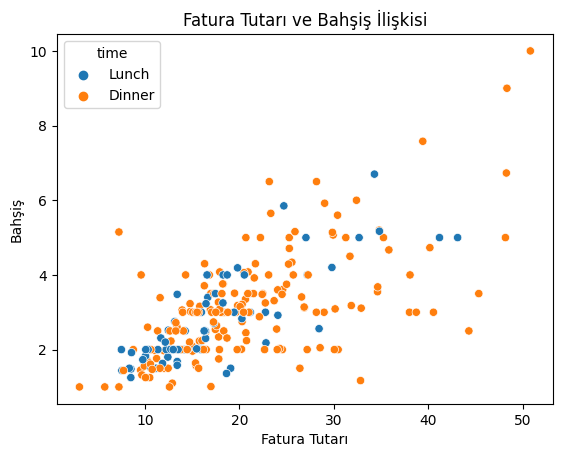

In [4]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
plt.title('Fatura Tutarı ve Bahşiş İlişkisi')
plt.xlabel('Fatura Tutarı')
plt.ylabel('Bahşiş')
plt.show()

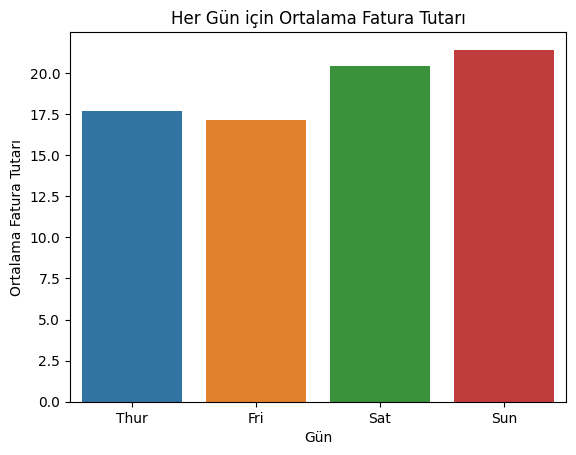

In [5]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

avg_total_bill = tips.groupby("day")["total_bill"].mean().reset_index()

# Barplot çizdir
sns.barplot(data=avg_total_bill, x="day", y="total_bill")
plt.title('Her Gün için Ortalama Fatura Tutarı')
plt.xlabel('Gün')
plt.ylabel('Ortalama Fatura Tutarı')
plt.show()

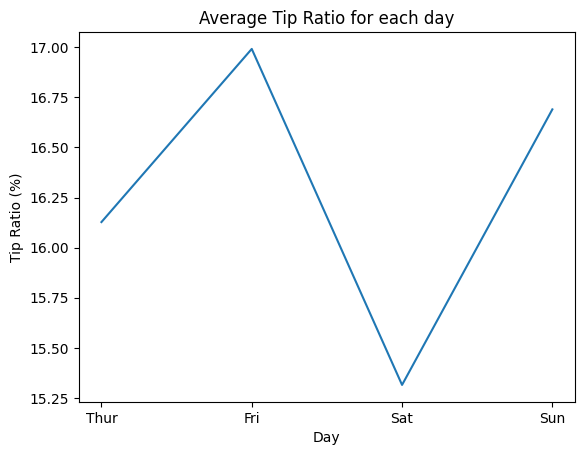

In [6]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.

tips["tip_pct"] = tips["tip"] / tips["total_bill"] * 100
avg_tip_pct = tips.groupby("day")["tip_pct"].mean().reset_index()

# Line plot çizdir
sns.lineplot(data=avg_tip_pct, x="day", y="tip_pct")
plt.title('Average Tip Ratio for each day')
plt.xlabel('Day')
plt.ylabel('Tip Ratio (%)')
plt.show()

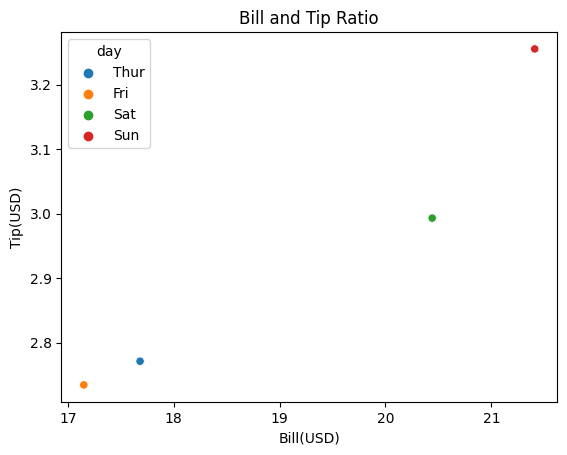

In [7]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.

avg_bill_tip = tips.groupby("day")[["total_bill", "tip"]].mean().reset_index()

# Scatterplot çizdir
sns.scatterplot(data=avg_bill_tip, x="total_bill", y="tip", hue="day")
plt.title('Bill and Tip Ratio')
plt.xlabel('Bill(USD)')
plt.ylabel('Tip(USD)')
plt.show()

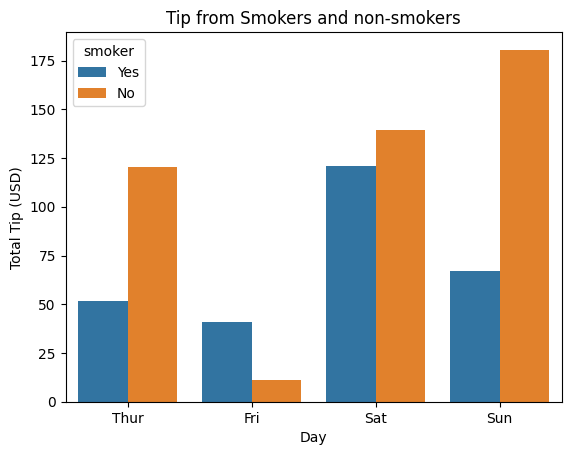

In [8]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.

tip_by_smoker_day = tips.groupby(["smoker", "day"])["tip"].sum().reset_index()

# Bar plot çizdir
sns.barplot(data=tip_by_smoker_day, x="day", y="tip", hue="smoker")
plt.title('Tip from Smokers and non-smokers')
plt.xlabel('Day')
plt.ylabel('Total Tip (USD)')
plt.show()

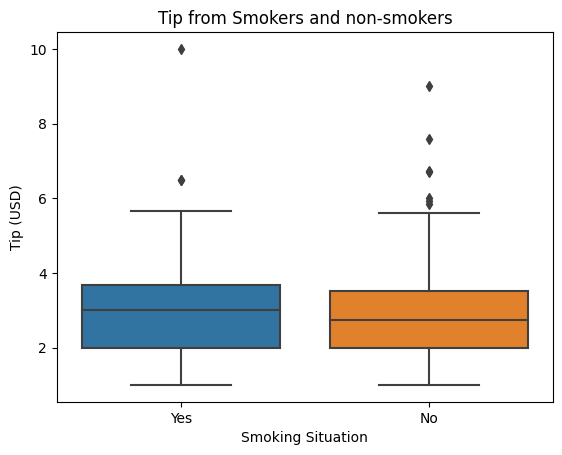

In [9]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.

sns.boxplot(data=tips, x="smoker", y="tip")
plt.title('Tip from Smokers and non-smokers')
plt.xlabel('Smoking Situation')
plt.ylabel('Tip (USD)')
plt.show()

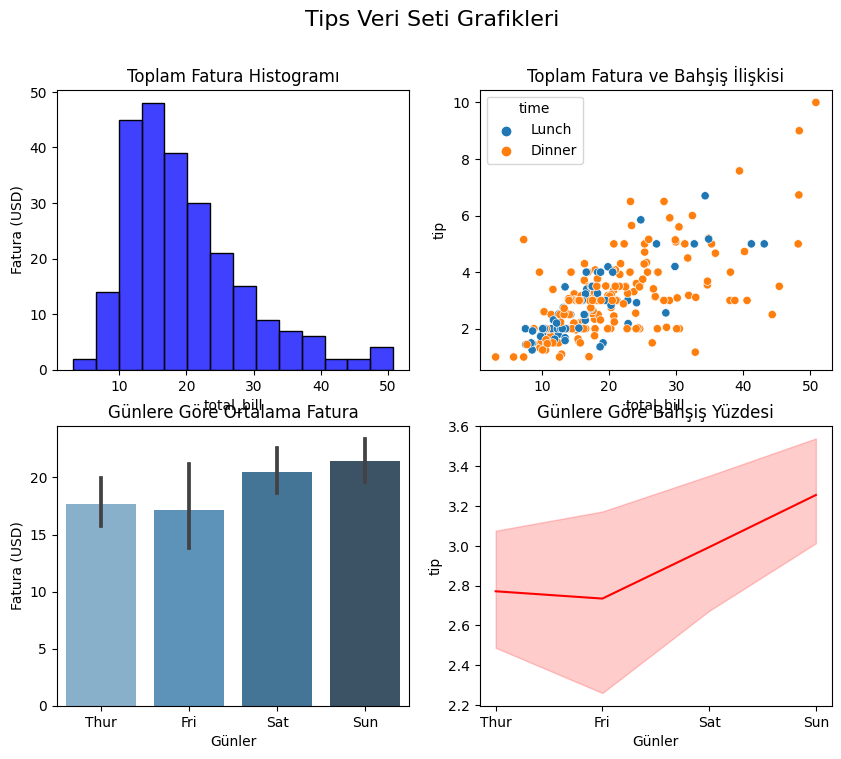

In [11]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# İlk subplot: total_bill histogramı
sns.histplot(data=tips, x="total_bill", ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Toplam Fatura Histogramı')

# İkinci subplot: total_bill vs tip scatterplot
sns.scatterplot(data=tips, x="total_bill", y="tip", ax=axs[0, 1], hue="time")
axs[0, 1].set_title('Toplam Fatura ve Bahşiş İlişkisi')

# Üçüncü subplot: günler için ortalama total_bill barplot
sns.barplot(data=tips, x="day", y="total_bill", ax=axs[1, 0], palette="Blues_d")
axs[1, 0].set_title('Günlere Göre Ortalama Fatura')

# Dördüncü subplot: günler için bahşiş yüzdesi lineplot
sns.lineplot(data=tips, x="day", y="tip", ax=axs[1, 1], markers=True, color='red')
axs[1, 1].set_title('Günlere Göre Bahşiş Yüzdesi')

# Alt başlığı ayarla
plt.suptitle('Tips Veri Seti Grafikleri', fontsize=16)

# Eksen etiketlerini ayarla
plt.setp(axs[-1, :], xlabel='Günler')
plt.setp(axs[:, 0], ylabel='Fatura (USD)')

# Grafikleri göster
plt.show()